In [1]:
import torch
import gpytorch
from Interfaces import DKLasso

C:\Users\Yixiao\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pyreadr

x = pyreadr.read_r('data/sim_interaction_X.RData')
y = pyreadr.read_r('data/sim_interaction_Y.RData')

In [3]:
x=x['X']
y=y['Y']

import numpy as np
x=np.array(x)
# change y to a vector
y = np.squeeze(y)
y=np.array(y)

In [4]:
seed=1234

import random
random.seed(seed)
o = random.sample(list(range(0,20000)),4000)
x = x[o,0:20]
y = y[o]


In [5]:
import sklearn
x = sklearn.preprocessing.StandardScaler().fit_transform(x)
y = sklearn.preprocessing.scale(y)

In [6]:
train_x = x[:3500, :]
train_y = y[:3500]
train_x = torch.FloatTensor(train_x)
train_y = torch.FloatTensor(train_y)

val_x = x[3500:4000, :]
val_y = y[3500:4000]
val_x = torch.FloatTensor(val_x)
val_y = torch.FloatTensor(val_y)


In [13]:
kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(ard_num_dims=4)) + gpytorch.kernels.ConstantKernel()

# %time
DKLassoObj = DKLasso(method="Regressor",
                     model_type="Exact",
                     kernel=kernel,
                    additive=False,
                    hidden_dims=(100,50,5,4),
                    res_dim=None,
                    batch_norm=False,
                    lambda_start=None,
                    lambda_max=float("inf"),
                    path_multiplier=(1.02,1.02),
                    gamma=1e-4,
                    M=10,
                    dropout=(0.2,),
                    lr=(1e-3, 1e-3),
                    n_epochs=(1000, 100),
                    patience=(100, 10),
                    offset=(1, 1),
                    grid_size=None,
                    batch_size=None,
                    val_size=0.15,
                    device=None,
                    verbose=0,
                    random_state=seed*2+1145,
                    torch_seed=seed*5+2333)

%time path = DKLassoObj.train_path(x=train_x, y=train_y)


Initialized DKL model
139 epochs, train_loss (NMLL) 1.050e+00, test_loss 1.440e+01, l2_reg 2.427e+01, l1_reg_skip 4.003e+00


C:\Users\Yixiao\miniconda3\lib\site-packages\gpytorch\distributions\multivariate_normal.py:319: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  warnings.warn(


CPU times: total: 4min 50s
Wall time: 5min 2s


In [13]:
kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(ard_num_dims=4)) + gpytorch.kernels.ConstantKernel()

# %time
DKLassoObj = DKLasso(method="Regressor",
                     model_type="Approximate",
                     kernel=kernel,
                    additive=False,
                    hidden_dims=(100,50,5,4),
                    res_dim=None,
                    batch_norm=True,
                    lambda_start=None,
                    lambda_max=float("inf"),
                    path_multiplier=(1.02,1.02),
                    gamma=1e-4,
                    M=10,
                    dropout=(0.2,),
                    lr=(1e-3, 1e-3),
                    n_epochs=(1000, 100),
                    patience=(100, 10),
                    offset=(1, 1),
                    grid_size=1000,
                    batch_size=None,
                    val_size=0.15,
                    device=None,
                    verbose=0,
                    random_state=seed*2+1145,
                    torch_seed=seed*5+2333)

%time path = DKLassoObj.train_path(x=train_x, y=train_y)


Initialized DKL model
135 epochs, train_loss (NMLL) 1.690e+00, test_loss 1.668e+00, l2_reg 1.953e+01, l1_reg_skip 5.931e+00
CPU times: total: 5min 31s
Wall time: 5min 59s


In [7]:
kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=2.5, ard_num_dims=4))

DKLassoObj2 = DKLasso(method="Regressor",
                     model_type="Exact",
                     kernel=kernel,
                    additive=True,
                    hidden_dims=(100,50,5,4),
                    res_dim=4,
                    batch_norm=False,
                    lambda_start=None,
                    lambda_max=float("inf"),
                    path_multiplier=(1.02,1.02),
                    gamma=1e-4,
                    M=10,
                    dropout=(0.2,),
                    lr=(1e-3, 1e-3),
                    n_epochs=(1000, 100),
                    patience=(100, 2),
                    offset=(1, 1),
                    grid_size=None,
                    batch_size=None,
                    val_size=0.15,
                    device=None,
                    verbose=0,
                    random_state=seed*2+1145,
                    torch_seed=seed*5+2333)

%time path2 = DKLassoObj2.train_path(x=train_x, y=train_y)

C:\Users\Yixiao\miniconda3\lib\site-packages\gpytorch\distributions\multivariate_normal.py:319: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  warnings.warn(



Initialized DKL model
505 epochs, train_loss (NMLL) 7.194e-01, test_loss 6.153e+01, l2_reg 3.414e+01, l1_reg_skip 4.396e+00
CPU times: total: 4min 20s
Wall time: 4min 48s


In [7]:
kernel = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=2.5, ard_num_dims=4))

DKLassoObj2 = DKLasso(method="Regressor",
                     model_type="Approximate",
                     kernel=kernel,
                    additive=True,
                    hidden_dims=(100,50,5,4),
                    res_dim=4,
                    batch_norm=True,
                    lambda_start=None,
                    lambda_max=float("inf"),
                    path_multiplier=(1.02,1.02),
                    gamma=1e-4,
                    M=10,
                    dropout=(0.2,),
                    lr=(1e-3, 1e-3),
                    n_epochs=(1000, 100),
                    patience=(100, 10),
                    offset=(1, 1),
                    grid_size=1000,
                    batch_size=None,
                    val_size=0.15,
                    device=None,
                    verbose=0,
                    random_state=seed*2+1145,
                    torch_seed=seed*5+2333)

%time path2 = DKLassoObj2.train_path(x=train_x, y=train_y)


Initialized DKL model
153 epochs, train_loss (NMLL) 1.734e+00, test_loss 1.557e+00, l2_reg 2.013e+01, l1_reg_skip 2.235e+00
CPU times: total: 7min 47s
Wall time: 8min 12s


In [14]:
DKLassoObj.model.parameters

<bound method Module.parameters of ApproxGP_Regressor(
  (variational_strategy): VariationalStrategy(
    (_variational_distribution): CholeskyVariationalDistribution()
  )
  (feature_extractor): FeatureExtractorLayer(
    (dropout): ModuleList(
      (0): Dropout(p=0.2, inplace=False)
      (1): Dropout(p=0.2, inplace=False)
      (2): Dropout(p=0.2, inplace=False)
    )
    (batchnorm): ModuleList(
      (0): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (layers): ModuleList(
      (0): Linear(in_features=20, out_features=100, bias=True)
      (1): Linear(in_features=100, out_features=50, bias=True)
      (2): Linear(in_features=50, out_features=5, bias=True)
      (3): Linear(in_features=5, out_features=4, bias=True)
    )
    (skip): Linear(in_features=20, out

In [9]:
DKLassoObj.model.feature_extractor.layers[-1]

Linear(in_features=5, out_features=4, bias=True)

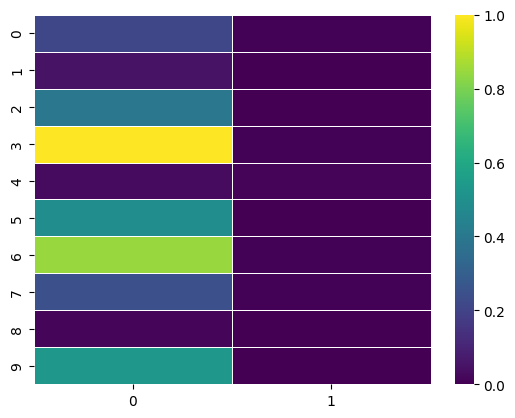

tensor(78.9334)

In [15]:
# DKLasso exact without batchnorm patience=10 ard_rbf
import matplotlib.pyplot as plt
import seaborn as sns

imp = DKLassoObj.feature_importances.reshape((2, 10))
imp = torch.transpose(imp, 0, 1)
imp -= imp.min()
imp /= imp.max()
ax = sns.heatmap(imp, linewidths=0.5, cmap="viridis")
plt.show()
torch.mean(imp[:,0])/torch.mean(imp[:,1:2])

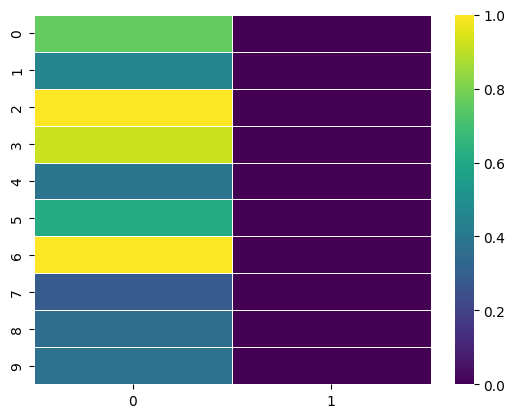

tensor(357.1658)

In [10]:
# exact with batchnorm patience=2
import matplotlib.pyplot as plt
import seaborn as sns

imp = DKLassoObj.feature_importances.reshape((2, 10))
imp = torch.transpose(imp, 0, 1)
imp -= imp.min()
imp /= imp.max()
ax = sns.heatmap(imp, linewidths=0.5, cmap="viridis")
plt.show()
torch.mean(imp[:,0])/torch.mean(imp[:,1:2])

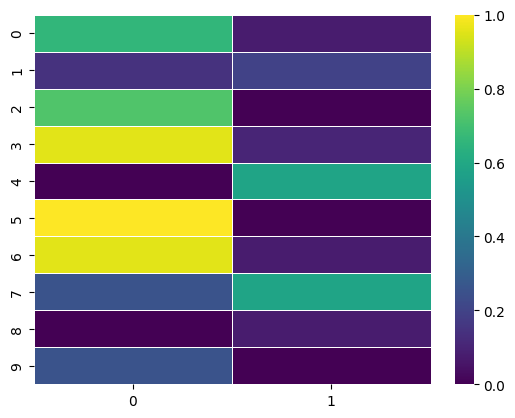

tensor(2.8994)

In [15]:
# DKLasso approx with batchnorm patience=10 ard_rbf
import matplotlib.pyplot as plt
import seaborn as sns

imp = DKLassoObj.feature_importances.reshape((2, 10))
imp = torch.transpose(imp, 0, 1)
imp -= imp.min()
imp /= imp.max()
ax = sns.heatmap(imp, linewidths=0.5, cmap="viridis")
plt.show()
torch.mean(imp[:,0])/torch.mean(imp[:,1:2])

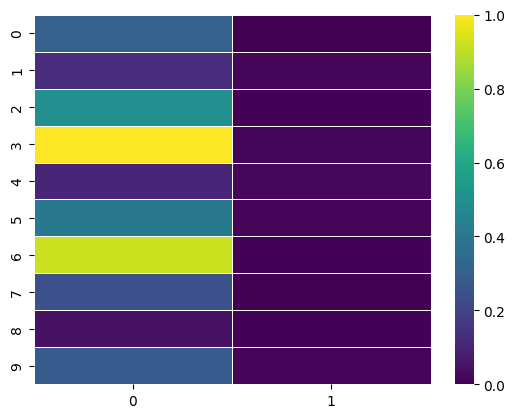

tensor(45.4978)

In [9]:
# DKLasso+ exact without batchnorm patience=2 ard_rbf
import matplotlib.pyplot as plt
import seaborn as sns

imp2 = DKLassoObj2.feature_importances.reshape((2, 10))
imp2 = torch.transpose(imp2, 0, 1)
imp2 -= imp2.min()
imp2 /= imp2.max()
ax = sns.heatmap(imp2, linewidths=0.5, cmap="viridis")
plt.show()
torch.mean(imp2[:,0])/torch.mean(imp2[:,1:2])

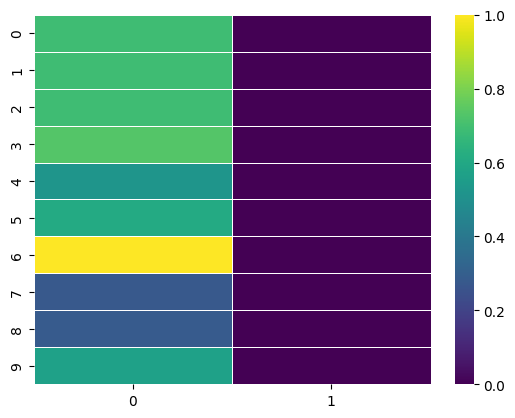

tensor(490.5360)

In [16]:
# exact with batchnorm patience=2
import matplotlib.pyplot as plt
import seaborn as sns

imp2 = DKLassoObj2.feature_importances.reshape((2, 10))
imp2 = torch.transpose(imp2, 0, 1)
imp2 -= imp2.min()
imp2 /= imp2.max()
ax = sns.heatmap(imp2, linewidths=0.5, cmap="viridis")
plt.show()
torch.mean(imp2[:,0])/torch.mean(imp2[:,1:2])

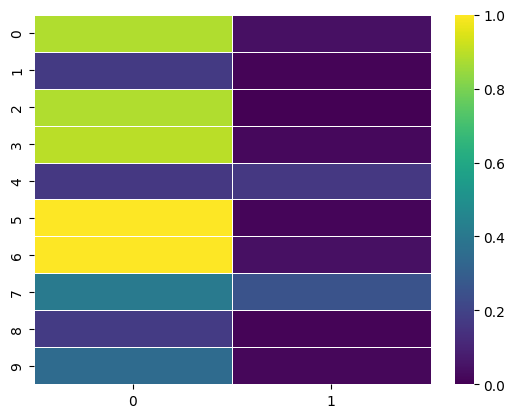

tensor(10.4290)

In [9]:
# DKLasso+ approx with batchnorm patience=10 ard_matern
import matplotlib.pyplot as plt
import seaborn as sns

imp2 = DKLassoObj2.feature_importances.reshape((2, 10))
imp2 = torch.transpose(imp2, 0, 1)
imp2 -= imp2.min()
imp2 /= imp2.max()
ax = sns.heatmap(imp2, linewidths=0.5, cmap="viridis")
plt.show()
torch.mean(imp2[:,0])/torch.mean(imp2[:,1:2])

In [16]:
import gpytorch
import torch
import math
from math import pi
import numpy
import scipy.stats


def mean_squared_error(
    f_mean,
    test_y: torch.Tensor,
):
    """
    Mean Squared Error.
    """
    se = torch.square(f_mean - test_y)
    se = numpy.array(se.detach().cpu())
    mse = numpy.mean(se)
    
    tval = scipy.stats.t.ppf(q=0.975, df=se.shape[0]-1)
    stand_err = numpy.std(se)/numpy.sqrt(se.shape[0])
    mse_lb = mse - tval*stand_err
    mse_ub = mse + tval*stand_err
    return mse, mse_lb, mse_ub


def mean_absolute_error(
    f_mean,
    test_y: torch.Tensor,
):
    """
    Mean Absolute Error.
    """
    ae = torch.abs(f_mean - test_y)
    ae = numpy.array(ae.detach().cpu())
    mae = numpy.mean(ae)
    
    tval = scipy.stats.t.ppf(q=0.975, df=ae.shape[0]-1)
    se = numpy.std(ae)/numpy.sqrt(ae.shape[0])
    mae_lb = mae - tval*se
    mae_ub = mae + tval*se
    return mae, mae_lb, mae_ub


def mean_standardized_log_loss(
    f_mean,
    f_var,
    test_y: torch.Tensor,
):
    """
    Mean Standardized Log Loss.
    Reference: Page No. 23,
    Gaussian Processes for Machine Learning,
    Carl Edward Rasmussen and Christopher K. I. Williams,
    The MIT Press, 2006. ISBN 0-262-18253-X
    """
    sll = 0.5 * torch.log(2 * pi * f_var) + torch.square(test_y - f_mean) / (2 * f_var)
    sll = numpy.array(sll.detach().cpu())
    msll = numpy.mean(sll)
    
    tval = scipy.stats.t.ppf(q=0.975, df=sll.shape[0]-1)
    se = numpy.std(sll)/numpy.sqrt(sll.shape[0])
    msll_lb = msll - tval*se
    msll_ub = msll + tval*se
    return msll, msll_lb, msll_ub


def cal_pred_error(path, DKLassoObj, x, y, type="MSLL"):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = DKLassoObj.model.to(device)
    likelihood = DKLassoObj.likelihood.to(device)
    val_x = x.to(device)
    val_y = y.to(device)

    model.eval()
    likelihood.eval()
    
    selected = math.ceil(path[0].selected.sum().item()*1.05)
    model.load_state_dict(path[0].state_dict)
    with torch.no_grad(), gpytorch.settings.use_toeplitz(False), gpytorch.settings.fast_pred_var(), gpytorch.settings.max_root_decomposition_size(100):
        pred_dist = likelihood(model(val_x))
    if type == "MSLL":
        # error = gpytorch.metrics.mean_standardized_log_loss(pred_dist, val_y).item()
        error, error_lb, error_ub = mean_standardized_log_loss(pred_dist.mean, pred_dist.variance, val_y)
    elif type == "MSE":
        # error = gpytorch.metrics.mean_squared_error(pred_dist, val_y).item()
        error, error_lb, error_ub = mean_squared_error(pred_dist.mean, val_y)
    elif type == "MAE":
        error, error_lb, error_ub = mean_absolute_error(pred_dist.mean, val_y)
        
    num_selected = [selected]
    num_visited = [1]
    test_loss = [path[0].test_loss]
    best_error = [error]
    best_error_lb = [error_lb]
    best_error_ub = [error_ub]
    path_idx = [0]
    for i in range(1,len(path)):
        selected = path[i].selected.sum().item()
        if selected in num_selected:
            slt_idx = num_selected.index(selected)
            num_visited[slt_idx] += 1
            model.load_state_dict(path[i].state_dict)
            with torch.no_grad(), gpytorch.settings.use_toeplitz(False), gpytorch.settings.fast_pred_var(), gpytorch.settings.max_root_decomposition_size(100):
                pred_dist = likelihood(model(val_x))
            if type == "MSLL":
                error, error_lb, error_ub = mean_standardized_log_loss(pred_dist.mean, pred_dist.variance, val_y)
            elif type == "MSE":
                # error = gpytorch.metrics.mean_squared_error(pred_dist, val_y).item()
                error, error_lb, error_ub = mean_squared_error(pred_dist.mean, val_y)
            elif type == "MAE":
                error, error_lb, error_ub = mean_absolute_error(pred_dist.mean, val_y)
                
            if error < best_error[slt_idx]:
                best_error[slt_idx] = error
                best_error_lb[slt_idx] = error_lb
                best_error_ub[slt_idx] = error_ub
                path_idx[slt_idx] = i
        else:
            model.load_state_dict(path[i].state_dict)
            with torch.no_grad(), gpytorch.settings.use_toeplitz(False), gpytorch.settings.fast_pred_var(), gpytorch.settings.max_root_decomposition_size(100):
                pred_dist = likelihood(model(val_x))
            if type == "MSLL":
                error, error_lb, error_ub = mean_standardized_log_loss(pred_dist.mean, pred_dist.variance, val_y)
            elif type == "MSE":
                # error = gpytorch.metrics.mean_squared_error(pred_dist, val_y).item()
                error, error_lb, error_ub = mean_squared_error(pred_dist.mean, val_y)
            elif type == "MAE":
                error, error_lb, error_ub = mean_absolute_error(pred_dist.mean, val_y)
                
            num_selected.append(selected)
            num_visited.append(1)
            test_loss.append(path[i].test_loss)
            best_error.append(error)
            best_error_lb.append(error_lb)
            best_error_ub.append(error_ub)
            path_idx.append(i)
            
        sort_idx = sorted(range(len(num_selected)), key=lambda k: num_selected[k], reverse=True)
        num_selected = [num_selected[k] for k in sort_idx]
        num_visited = [num_visited[k] for k in sort_idx]
        test_loss = [test_loss[k] for k in sort_idx]
        best_error = [best_error[k] for k in sort_idx]
        best_error_lb = [best_error_lb[k] for k in sort_idx]
        best_error_ub = [best_error_ub[k] for k in sort_idx]
        path_idx = [path_idx[k] for k in sort_idx]
        
    return num_selected, num_visited, test_loss, best_error, best_error_lb, best_error_ub, path_idx

In [17]:
# DKLasso
DKLasso_msll_selected, DKLasso_msll_num_visited, DKLasso_msll_test_loss, DKLasso_msll_error, DKLasso_msll_error_lb, DKLasso_msll_error_ub, DKLasso_msll_path_idx = cal_pred_error(path=path, DKLassoObj=DKLassoObj, x=val_x, y=val_y, type="MSLL")


In [11]:
# DKLLasso
DKLasso_msll_selected2, DKLasso_msll_num_visited2, DKLasso_msll_test_loss2, DKLasso_msll_error2, DKLasso_msll_error_lb2, DKLasso_msll_error_ub2, DKLasso_msll_path_idx2 = cal_pred_error(path=path2, DKLassoObj=DKLassoObj2, x=val_x, y=val_y, type="MSLL")


Text(0.5, 1.0, 'Mean Standardized Log Loss')

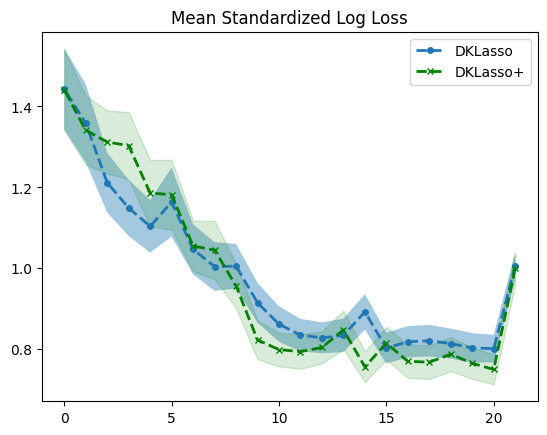

In [20]:
# DKLasso matern patience=2 + DKLasso+ matern patience=2  exact + with batch_norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_msll_selected, DKLasso_msll_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_msll_selected2, DKLasso_msll_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLasso+")
ax.legend(handles=[Non_additive, Additive])
ax.fill_between(DKLasso_msll_selected, DKLasso_msll_error_lb, DKLasso_msll_error_ub, alpha=0.4)
ax.fill_between(DKLasso_msll_selected2, DKLasso_msll_error_lb2, DKLasso_msll_error_ub2, alpha=0.15, color="green")
plt.title("Mean Standardized Log Loss")
# plt.xticks(xi)

Text(0.5, 1.0, 'Mean Standardized Log Loss')

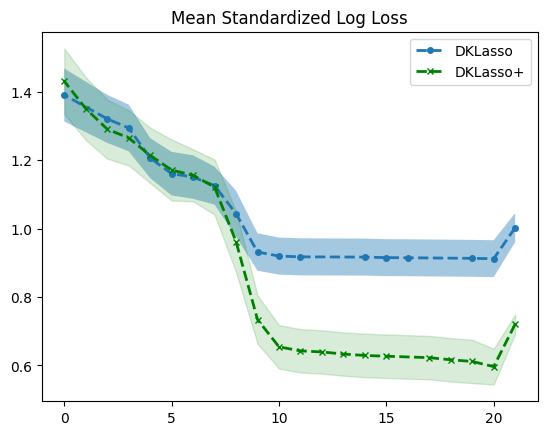

In [18]:
# DKLasso ard_rbf patience=10 || DKLasso+ ard_matern patience=2 || exact + without batch_norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_msll_selected, DKLasso_msll_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_msll_selected2, DKLasso_msll_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLasso+")
ax.legend(handles=[Non_additive, Additive])
ax.fill_between(DKLasso_msll_selected, DKLasso_msll_error_lb, DKLasso_msll_error_ub, alpha=0.4)
ax.fill_between(DKLasso_msll_selected2, DKLasso_msll_error_lb2, DKLasso_msll_error_ub2, alpha=0.15, color="green")
plt.title("Mean Standardized Log Loss")
# plt.xticks(xi)

Text(0.5, 1.0, 'Mean Standardized Log Loss')

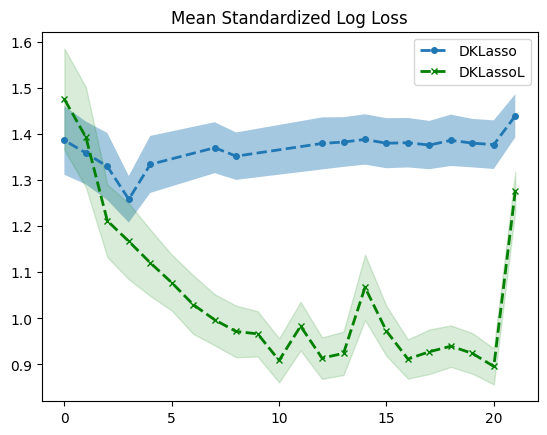

In [17]:
#periodic 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_msll_selected, DKLasso_msll_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_msll_selected2, DKLasso_msll_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLassoL")
ax.legend(handles=[Non_additive, Additive])
ax.fill_between(DKLasso_msll_selected, DKLasso_msll_error_lb, DKLasso_msll_error_ub, alpha=0.4)
ax.fill_between(DKLasso_msll_selected2, DKLasso_msll_error_lb2, DKLasso_msll_error_ub2, alpha=0.15, color="green")
plt.title("Mean Standardized Log Loss")
# plt.xticks(xi)

Text(0.5, 1.0, 'Mean Standardized Log Loss')

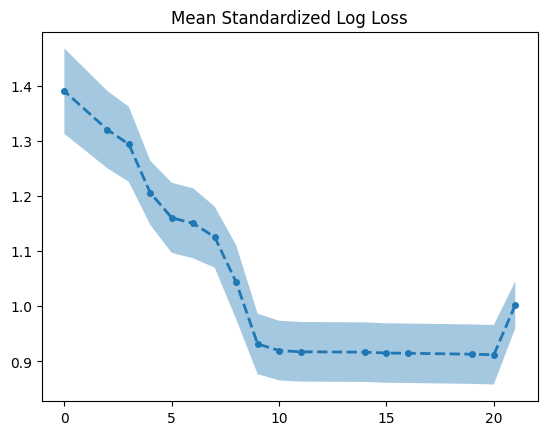

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_msll_selected, DKLasso_msll_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
ax.fill_between(DKLasso_msll_selected, DKLasso_msll_error_lb, DKLasso_msll_error_ub, alpha=0.4)
plt.title("Mean Standardized Log Loss")
# plt.xticks(xi)

Text(0.5, 1.0, 'Mean Standardized Log Loss')

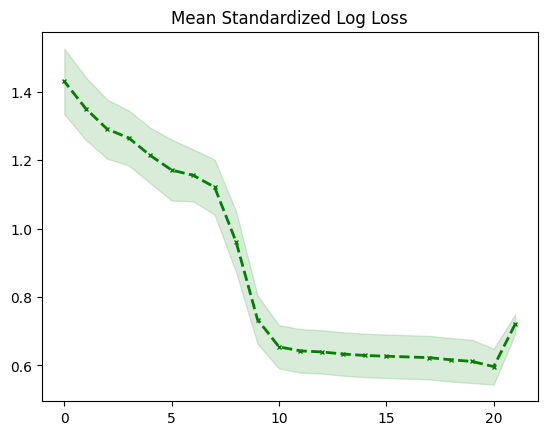

In [12]:
# ard_matern kernel
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
#Non_additive, = ax.plot(DKLasso_msll_selected, DKLasso_msll_error, marker='o', linestyle='dashed', linewidth=2, markersize=2.5, label='DKLasso')
Additive, = ax.plot(DKLasso_msll_selected2, DKLasso_msll_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=2.5, label="DKLassoL")
#ax.legend(handles=[Non_additive, Additive])
#ax.fill_between(DKLasso_msll_selected, DKLasso_msll_error_lb, DKLasso_msll_error_ub, alpha=0.4)
ax.fill_between(DKLasso_msll_selected2, DKLasso_msll_error_lb2, DKLasso_msll_error_ub2, alpha=0.15, color="green")
plt.title("Mean Standardized Log Loss")

In [17]:
DKLasso_mse_selected, DKLasso_mse_num_visited, DKLasso_mse_test_loss, DKLasso_mse_error, DKLasso_mse_error_lb, DKLasso_mse_error_ub, DKLasso_mse_path_idx = cal_pred_error(path=path, DKLassoObj=DKLassoObj, x=val_x, y=val_y, type="MSE")
DKLasso_mse_selected2, DKLasso_mse_num_visited2, DKLasso_mse_test_loss2, DKLasso_mse_error2, DKLasso_mse_error_lb2, DKLasso_mse_error_ub2, DKLasso_mse_path_idx2 = cal_pred_error(path=path2, DKLassoObj=DKLassoObj2, x=val_x, y=val_y, type="MSE")

Text(0.5, 1.0, 'Mean Squared Error')

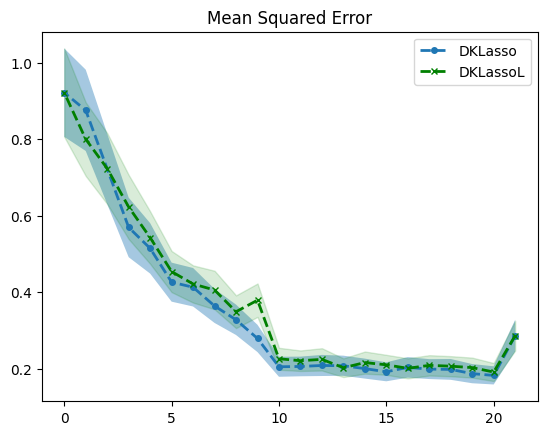

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_mse_selected, DKLasso_mse_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_mse_selected2, DKLasso_mse_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLassoL")
ax.legend(handles=[Non_additive, Additive])
ax.fill_between(DKLasso_mse_selected, DKLasso_mse_error_lb, DKLasso_mse_error_ub, alpha=0.4)
ax.fill_between(DKLasso_mse_selected2, DKLasso_mse_error_lb2, DKLasso_mse_error_ub2, alpha=0.15, color="green")
plt.title("Mean Squared Error")
# plt.xticks(xi)

Text(0.5, 1.0, 'Mean Squared Error')

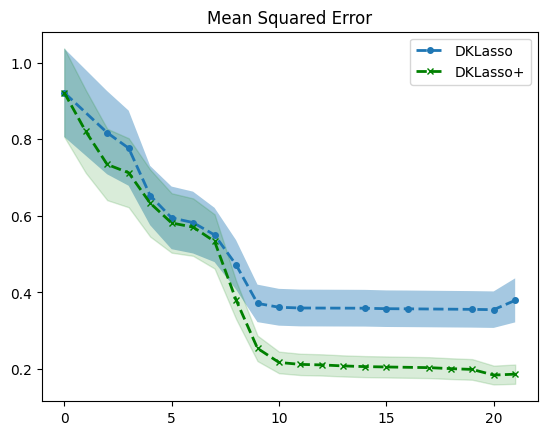

In [20]:
# DKLasso ard_rbf patience=10 || DKLasso+ ard_matern patience=2 || exact + without batch_norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_mse_selected, DKLasso_mse_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_mse_selected2, DKLasso_mse_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLasso+")
ax.legend(handles=[Non_additive, Additive])
ax.fill_between(DKLasso_mse_selected, DKLasso_mse_error_lb, DKLasso_mse_error_ub, alpha=0.4)
ax.fill_between(DKLasso_mse_selected2, DKLasso_mse_error_lb2, DKLasso_mse_error_ub2, alpha=0.15, color="green")
plt.title("Mean Squared Error")
# plt.xticks(xi)

Text(0.5, 1.0, 'Mean Squared Error')

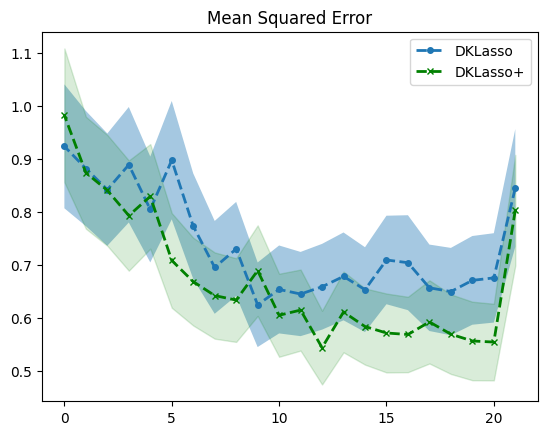

In [18]:
#approximate with batchnorm patience=10 DKLasso ard_rbf  |  DKLasso+ ard_matern
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_mse_selected, DKLasso_mse_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_mse_selected2, DKLasso_mse_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLasso+")
ax.legend(handles=[Non_additive, Additive])
ax.fill_between(DKLasso_mse_selected, DKLasso_mse_error_lb, DKLasso_mse_error_ub, alpha=0.4)
ax.fill_between(DKLasso_mse_selected2, DKLasso_mse_error_lb2, DKLasso_mse_error_ub2, alpha=0.15, color="green")
plt.title("Mean Squared Error")
# plt.xticks(xi)

In [10]:
DKLasso_mse_selected, DKLasso_mse_num_visited, DKLasso_mse_test_loss, DKLasso_mse_error, DKLasso_mse_error_lb, DKLasso_mse_error_ub, DKLasso_mse_path_idx = cal_pred_error(path=path, DKLassoObj=DKLassoObj, x=val_x, y=val_y, type="MSE")

Text(0.5, 1.0, 'Mean Squared Error')

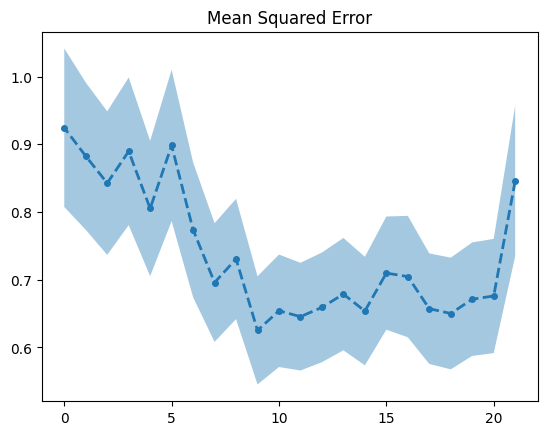

In [11]:
#approximate
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_mse_selected, DKLasso_mse_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
ax.fill_between(DKLasso_mse_selected, DKLasso_mse_error_lb, DKLasso_mse_error_ub, alpha=0.4)
plt.title("Mean Squared Error")
# plt.xticks(xi)

In [27]:
DKLasso_mae_selected, DKLasso_mae_num_visited, DKLasso_mae_test_loss, DKLasso_mae_error, DKLasso_mae_error_lb, DKLasso_mae_error_ub, DKLasso_mae_path_idx = cal_pred_error(path=path, DKLassoObj=DKLassoObj, x=val_x, y=val_y, type="MAE")
DKLasso_mae_selected2, DKLasso_mae_num_visited2, DKLasso_mae_test_loss2, DKLasso_mae_error2, DKLasso_mae_error_lb2, DKLasso_mae_error_ub2, DKLasso_mae_path_idx2 = cal_pred_error(path=path2, DKLassoObj=DKLassoObj2, x=val_x, y=val_y, type="MAE")

Text(0.5, 1.0, 'Mean Absolute Error')

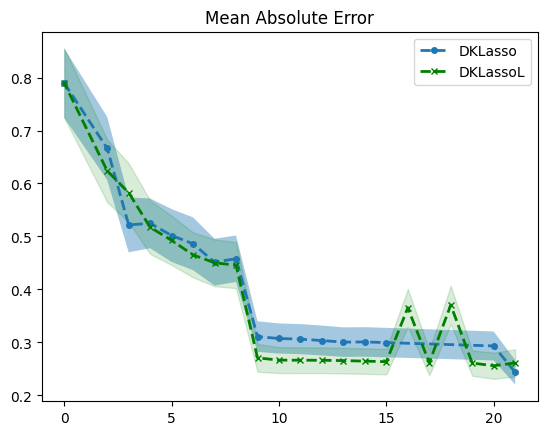

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_mae_selected, DKLasso_mae_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_mae_selected2, DKLasso_mae_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLassoL")
ax.legend(handles=[Non_additive, Additive])
ax.fill_between(DKLasso_mae_selected, DKLasso_mae_error_lb, DKLasso_mae_error_ub, alpha=0.4)
ax.fill_between(DKLasso_mae_selected2, DKLasso_mae_error_lb2, DKLasso_mae_error_ub2, alpha=0.15, color="green")
plt.title("Mean Absolute Error")
# plt.xticks(xi)

In [21]:
%%capture
from lassonet import LassoNetRegressor

lassonet_model = LassoNetRegressor(
    hidden_dims=(100,50,5),
    verbose=False,
    gamma=1e-4,
    M=10,
    dropout=0.2,
    val_size = 0.15,
    random_state=seed*2+1145,
    torch_seed=seed*5+2333,
)
lassonet_path = lassonet_model.path(train_x, train_y)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

n_selected = []

mse = []
sq_err = []

mae = []
ab_err = []

for save in lassonet_path:
    lassonet_model.load(save.state_dict)
    y_pred = lassonet_model.predict(val_x)
    n_selected.append(save.selected.sum().cpu().numpy())
    mse.append(mean_squared_error(val_y, torch.reshape(y_pred.cpu(),(y_pred.shape[0],))))
    mae.append(mean_absolute_error(val_y, torch.reshape(y_pred.cpu(),(y_pred.shape[0],))))
    sq_err.append(torch.square(val_y.cpu() - torch.reshape(y_pred.cpu(),(y_pred.shape[0],))))
    ab_err.append(torch.abs(val_y.cpu() - torch.reshape(y_pred.cpu(),(y_pred.shape[0],))))

In [23]:
import numpy
import scipy.stats
import math

def cal_lassonet_error(val_y, n_selected, err, err_list):
    num_selected = [math.ceil(n_selected[0]*1.05)]
    num_visited = [1]
    tval = scipy.stats.t.ppf(q=0.975, df=val_y.shape[0]-1)

    best_err = [err[0]]
    se = numpy.std(numpy.array(err_list[0]))/numpy.sqrt(val_y.shape[0])
    best_err_lb = [err[0] - tval*se]
    best_err_ub = [err[0] + tval*se]
    path_idx = [0]

    for i in range(1,len(n_selected)):
        selected = n_selected[i]
        if selected in num_selected:
            slt_idx = num_selected.index(selected)
            num_visited[slt_idx] += 1
            if err[i] < best_err[slt_idx]:
                best_err[slt_idx] = err[i]
                se = numpy.std(numpy.array(err_list[i]))/numpy.sqrt(val_y.shape[0])
                best_err_lb[slt_idx] = err[i] - tval*se
                best_err_ub[slt_idx] = err[i] + tval*se
                path_idx[slt_idx] = i
        else:       
            num_selected.append(selected)
            num_visited.append(1)
            best_err.append(err[i])
            se = numpy.std(numpy.array(err_list[i]))/numpy.sqrt(val_y.shape[0])
            best_err_lb.append(err[i] - tval*se)
            best_err_ub.append(err[i] + tval*se)
            path_idx.append(i)
            
    sort_idx = sorted(range(len(num_selected)), key=lambda k: num_selected[k], reverse=True)
    num_selected = [num_selected[k] for k in sort_idx]
    num_visited = [num_visited[k] for k in sort_idx]
    best_err = [best_err[k] for k in sort_idx]
    best_err_lb = [best_err_lb[k] for k in sort_idx]
    best_err_ub = [best_err_ub[k] for k in sort_idx]
    path_idx = [path_idx[k] for k in sort_idx]

    return num_selected, num_visited, best_err, best_err_lb, best_err_ub, path_idx

In [24]:
lassonet_mse_selected, lassonet_mse_num_visited, lassonet_mse_error, lassonet_mse_error_lb, lassonet_mse_error_ub, lassonet_mse_path_idx = cal_lassonet_error(val_y=val_y, n_selected=n_selected, err=mse, err_list=sq_err)

Text(0.5, 1.0, 'Mean Squared Error')

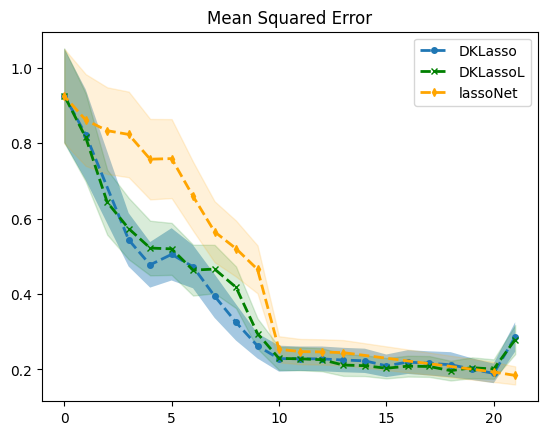

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_mse_selected, DKLasso_mse_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_mse_selected2, DKLasso_mse_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLassoL")
lassonet, = ax.plot(lassonet_mse_selected, lassonet_mse_error, color='orange', marker='d', linestyle='dashed', linewidth=2, markersize=4, label='lassoNet')
ax.legend(handles=[Non_additive, Additive, lassonet])
ax.fill_between(DKLasso_mse_selected, DKLasso_mse_error_lb, DKLasso_mse_error_ub, alpha=0.4)
ax.fill_between(DKLasso_mse_selected2, DKLasso_mse_error_lb2, DKLasso_mse_error_ub2, alpha=0.15, color="green")
ax.fill_between(lassonet_mse_selected, lassonet_mse_error_lb, lassonet_mse_error_ub, alpha=0.15,color="orange")
plt.title("Mean Squared Error")
# plt.xticks(xi)

Text(0.5, 1.0, 'Mean Squared Error')

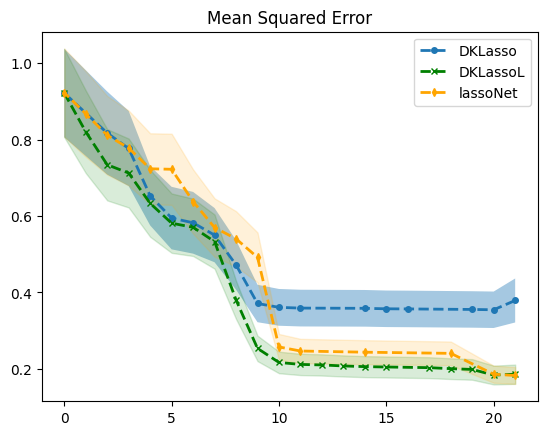

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_mse_selected, DKLasso_mse_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_mse_selected2, DKLasso_mse_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLassoL")
lassonet, = ax.plot(lassonet_mse_selected, lassonet_mse_error, color='orange', marker='d', linestyle='dashed', linewidth=2, markersize=4, label='lassoNet')
ax.legend(handles=[Non_additive, Additive, lassonet])
ax.fill_between(DKLasso_mse_selected, DKLasso_mse_error_lb, DKLasso_mse_error_ub, alpha=0.4)
ax.fill_between(DKLasso_mse_selected2, DKLasso_mse_error_lb2, DKLasso_mse_error_ub2, alpha=0.15, color="green")
ax.fill_between(lassonet_mse_selected, lassonet_mse_error_lb, lassonet_mse_error_ub, alpha=0.15,color="orange")
plt.title("Mean Squared Error")
# plt.xticks(xi)

In [34]:
lassonet_mae_selected, lassonet_mae_num_visited, lassonet_mae_error, lassonet_mae_error_lb, lassonet_mae_error_ub, lassonet_mae_path_idx = cal_lassonet_error(val_y=val_y, n_selected=n_selected, err=mae, err_list=ab_err)

Text(0.5, 1.0, 'Mean Absolute Error')

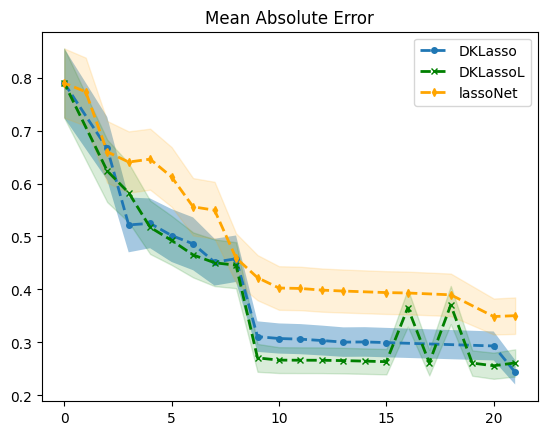

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_mae_selected, DKLasso_mae_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_mae_selected2, DKLasso_mae_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLassoL")
lassonet, = ax.plot(lassonet_mae_selected, lassonet_mae_error, color='orange', marker='d', linestyle='dashed', linewidth=2, markersize=4, label='lassoNet')
ax.legend(handles=[Non_additive, Additive, lassonet])
ax.fill_between(DKLasso_mae_selected, DKLasso_mae_error_lb, DKLasso_mae_error_ub, alpha=0.4)
ax.fill_between(DKLasso_mae_selected2, DKLasso_mae_error_lb2, DKLasso_mae_error_ub2, alpha=0.15, color="green")
ax.fill_between(lassonet_mae_selected, lassonet_mae_error_lb, lassonet_mae_error_ub, alpha=0.15,color="orange")
plt.title("Mean Absolute Error")
# plt.xticks(xi)

In [26]:
import gpytorch
import tqdm

In [27]:
lassonet_model.load(lassonet_path[0].state_dict)

LassoNetRegressor(device=device(type='cuda'), dropout=0.2, gamma=0.0001,
                  hidden_dims=(100, 50, 5), random_state=3613, torch_seed=8503,
                  val_size=0.15, verbose=False)

In [28]:
lassonet_model.model.layers

ModuleList(
  (0): Linear(in_features=20, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=50, bias=True)
  (2): Linear(in_features=50, out_features=5, bias=True)
  (3): Linear(in_features=5, out_features=1, bias=True)
)

In [34]:
class FeatureExtractor(torch.nn.Sequential):
    def __init__(self, trained_net):
        super(FeatureExtractor, self).__init__()
        self.add_module('linear1', trained_net[0])
        self.add_module('relu1', torch.nn.ReLU())
        self.add_module('linear2', trained_net[1])
        self.add_module('relu2', torch.nn.ReLU())
        self.add_module('linear3', trained_net[2])
        self.add_module('relu3', torch.nn.ReLU())
        self.add_module('linear4', torch.nn.Linear(5, 4, bias=True))
        # self.add_module('linear4', trained_net[3])
        # self.add_module('relu4', torch.nn.ReLU())
        # self.add_module('linear5', trained_net[4])
        # self.add_module('scale1', torch.nn.Tanh())
        
feature_extractor = FeatureExtractor(lassonet_model.model.layers[:-1]).cuda()

In [35]:
feature_extractor

FeatureExtractor(
  (linear1): Linear(in_features=20, out_features=100, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=50, out_features=5, bias=True)
  (relu3): ReLU()
  (linear4): Linear(in_features=5, out_features=4, bias=True)
)

In [36]:
feature_extractor(val_x.cuda()).shape

torch.Size([500, 4])

In [37]:
class GPRegressionModel(gpytorch.models.ExactGP):
        def __init__(self, train_x, train_y, likelihood, feature_extractor):
            super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
            self.mean_module = gpytorch.means.ConstantMean()
            self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(ard_num_dims=4)) + gpytorch.kernels.ConstantKernel()
            self.feature_extractor = feature_extractor

            # This module will scale the NN features so that they're nice values
            #self.scale_to_bounds = gpytorch.utils.grid.ScaleToBounds(-1., 1.)

        def forward(self, x):
            # We're first putting our data through a deep net (feature extractor)
            projected_x = self.feature_extractor(x)
            #projected_x = self.scale_to_bounds(projected_x)  # Make the NN values "nice"

            mean_x = self.mean_module(projected_x)
            covar_x = self.covar_module(projected_x)
            return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [38]:
def mean_squared_error(
    f_mean,
    test_y: torch.Tensor,
):
    """
    Mean Squared Error.
    """
    se = torch.square(f_mean - test_y)
    se = numpy.array(se.detach().cpu())
    mse = numpy.mean(se)
    
    tval = scipy.stats.t.ppf(q=0.975, df=se.shape[0]-1)
    stand_err = numpy.std(se)/numpy.sqrt(se.shape[0])
    mse_lb = mse - tval*stand_err
    mse_ub = mse + tval*stand_err
    return mse, mse_lb, mse_ub


lassoGP_mse_err = []
lassoGP_mse_err_lb = []
lassoGP_mse_err_ub = []
    
training_iterations = 50

train_x_lassoGP = train_x.cuda()
train_y_lassoGP = train_y.cuda()
val_x_lassoGP = val_x.cuda()
val_y_lassoGP = val_y.cuda()

for idx in lassonet_mse_path_idx:
    print(n_selected[idx])
    lassonet_model.load(lassonet_path[idx].state_dict)
    feature_extractor = FeatureExtractor(lassonet_model.model.layers[:-1])
    
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = GPRegressionModel(train_x_lassoGP, train_y_lassoGP, likelihood, feature_extractor)

    model = model.cuda()
    likelihood = likelihood.cuda()

    # Find optimal model hyperparameters
    model.train()
    likelihood.train()

    # Use the adam optimizer
    optimizer = torch.optim.Adam([
        {'params': model.covar_module.parameters()},
        {'params': model.mean_module.parameters()},
        {'params': model.likelihood.parameters()},
    ], lr=0.001)

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    #iterator = tqdm.notebook.tqdm(range(training_iterations))
    for i in range(training_iterations):
        # Zero backprop gradients
        optimizer.zero_grad()
        # Get output from model
        output = model(train_x_lassoGP)
        # Calc loss and backprop derivatives
        loss = -mll(output, train_y_lassoGP)
        loss.backward()
        #iterator.set_postfix(loss=loss.item())
        optimizer.step()
    
    model.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.use_toeplitz(False), gpytorch.settings.fast_pred_var(), gpytorch.settings.max_root_decomposition_size(100):
        pred_dist = likelihood(model(val_x_lassoGP))
    mse_error, mse_error_lb, mse_error_ub = mean_squared_error(pred_dist.mean, val_y_lassoGP)

    lassoGP_mse_err.append(mse_error)
    lassoGP_mse_err_lb.append(mse_error_lb)
    lassoGP_mse_err_ub.append(mse_error_ub)

20
20
18
14
11
10
9
8
7
6
5
4
3
2
1
0


Text(0.5, 1.0, 'Mean Squared Error')

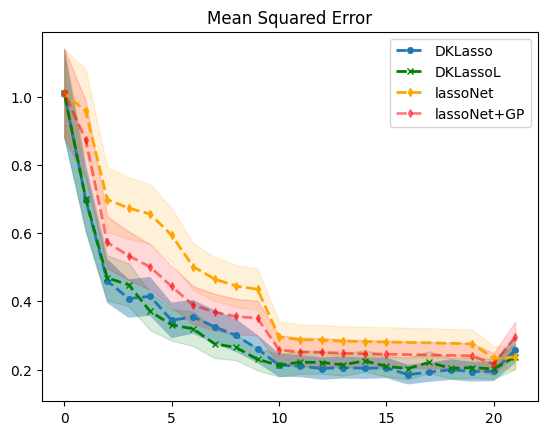

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

Non_additive, = ax.plot(DKLasso_mse_selected, DKLasso_mse_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_mse_selected2, DKLasso_mse_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLassoL")
lassonet, = ax.plot(lassonet_mse_selected, lassonet_mse_error, color='orange', marker='d', linestyle='dashed', linewidth=2, markersize=4, label='lassoNet')
lassoGP, = ax.plot(lassonet_mse_selected, lassoGP_mse_err, color='red', alpha = 0.5, marker='d', linestyle='dashed', linewidth=2, markersize=4, label='lassoNet+GP')
ax.legend(handles=[Non_additive, Additive, lassonet, lassoGP])
ax.fill_between(DKLasso_mse_selected, DKLasso_mse_error_lb, DKLasso_mse_error_ub, alpha=0.4)
ax.fill_between(DKLasso_mse_selected2, DKLasso_mse_error_lb2, DKLasso_mse_error_ub2, alpha=0.15, color="green")
ax.fill_between(lassonet_mse_selected, lassonet_mse_error_lb, lassonet_mse_error_ub, alpha=0.15,color="orange")
ax.fill_between(lassonet_mse_selected, lassoGP_mse_err_lb, lassoGP_mse_err_ub, alpha=0.15,color="red")
plt.title("Mean Squared Error")

#xi = list(range(19))
#xi = [0,10,20,30,40,50,60,70,80,90,100]
#plt.xticks(xi)


Text(0.5, 1.0, 'Mean Squared Error')

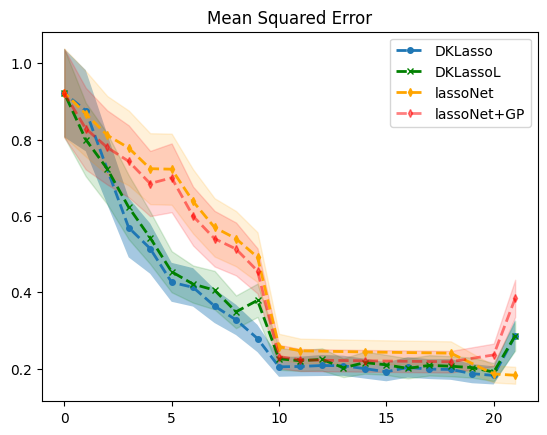

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

Non_additive, = ax.plot(DKLasso_mse_selected, DKLasso_mse_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_mse_selected2, DKLasso_mse_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLassoL")
lassonet, = ax.plot(lassonet_mse_selected, lassonet_mse_error, color='orange', marker='d', linestyle='dashed', linewidth=2, markersize=4, label='lassoNet')
lassoGP, = ax.plot(lassonet_mse_selected, lassoGP_mse_err, color='red', alpha = 0.5, marker='d', linestyle='dashed', linewidth=2, markersize=4, label='lassoNet+GP')
ax.legend(handles=[Non_additive, Additive, lassonet, lassoGP])
ax.fill_between(DKLasso_mse_selected, DKLasso_mse_error_lb, DKLasso_mse_error_ub, alpha=0.4)
ax.fill_between(DKLasso_mse_selected2, DKLasso_mse_error_lb2, DKLasso_mse_error_ub2, alpha=0.15, color="green")
ax.fill_between(lassonet_mse_selected, lassonet_mse_error_lb, lassonet_mse_error_ub, alpha=0.15,color="orange")
ax.fill_between(lassonet_mse_selected, lassoGP_mse_err_lb, lassoGP_mse_err_ub, alpha=0.15,color="red")
plt.title("Mean Squared Error")

#xi = list(range(19))
#xi = [0,10,20,30,40,50,60,70,80,90,100]
#plt.xticks(xi)


Text(0.5, 1.0, 'Mean Squared Error')

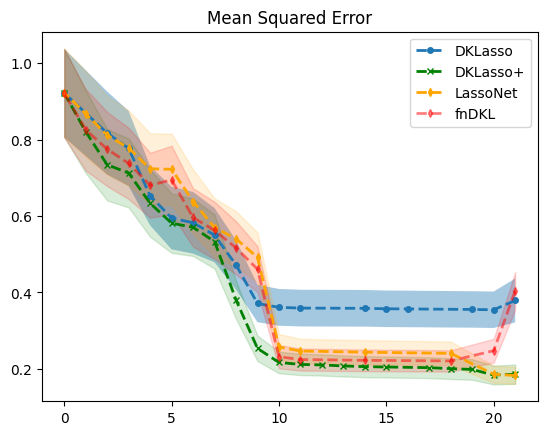

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

Non_additive, = ax.plot(DKLasso_mse_selected, DKLasso_mse_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_mse_selected2, DKLasso_mse_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLasso+")
lassonet, = ax.plot(lassonet_mse_selected, lassonet_mse_error, color='orange', marker='d', linestyle='dashed', linewidth=2, markersize=4, label='LassoNet')
lassoGP, = ax.plot(lassonet_mse_selected, lassoGP_mse_err, color='red', alpha = 0.5, marker='d', linestyle='dashed', linewidth=2, markersize=4, label='fnDKL')
ax.legend(handles=[Non_additive, Additive, lassonet, lassoGP])
ax.fill_between(DKLasso_mse_selected, DKLasso_mse_error_lb, DKLasso_mse_error_ub, alpha=0.4)
ax.fill_between(DKLasso_mse_selected2, DKLasso_mse_error_lb2, DKLasso_mse_error_ub2, alpha=0.15, color="green")
ax.fill_between(lassonet_mse_selected, lassonet_mse_error_lb, lassonet_mse_error_ub, alpha=0.15,color="orange")
ax.fill_between(lassonet_mse_selected, lassoGP_mse_err_lb, lassoGP_mse_err_ub, alpha=0.15,color="red")
plt.title("Mean Squared Error")

#xi = list(range(19))
#xi = [0,10,20,30,40,50,60,70,80,90,100]
#plt.xticks(xi)


In [44]:
def mean_absolute_error(
    f_mean,
    test_y: torch.Tensor,
):
    """
    Mean Absolute Error.
    """
    ae = torch.abs(f_mean - test_y)
    ae = numpy.array(ae.detach().cpu())
    mae = numpy.mean(ae)
    
    tval = scipy.stats.t.ppf(q=0.975, df=ae.shape[0]-1)
    se = numpy.std(ae)/numpy.sqrt(ae.shape[0])
    mae_lb = mae - tval*se
    mae_ub = mae + tval*se
    return mae, mae_lb, mae_ub

lassoGP_mae_err = []
lassoGP_mae_err_lb = []
lassoGP_mae_err_ub = []
    
training_iterations = 50

train_x_lassoGP = train_x.cuda()
train_y_lassoGP = train_y.cuda()
val_x_lassoGP = val_x.cuda()
val_y_lassoGP = val_y.cuda()

for idx in lassonet_mae_path_idx:
    print(n_selected[idx])
    lassonet_model.load(lassonet_path[idx].state_dict)
    feature_extractor = FeatureExtractor(lassonet_model.model.layers[:-1])
    
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = GPRegressionModel(train_x_lassoGP, train_y_lassoGP, likelihood, feature_extractor)

    model = model.cuda()
    likelihood = likelihood.cuda()

    # Find optimal model hyperparameters
    model.train()
    likelihood.train()

    # Use the adam optimizer
    optimizer = torch.optim.Adam([
        {'params': model.covar_module.parameters()},
        {'params': model.mean_module.parameters()},
        {'params': model.likelihood.parameters()},
    ], lr=0.001)

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    #iterator = tqdm.notebook.tqdm(range(training_iterations))
    for i in range(training_iterations):
        # Zero backprop gradients
        optimizer.zero_grad()
        # Get output from model
        output = model(train_x_lassoGP)
        # Calc loss and backprop derivatives
        loss = -mll(output, train_y_lassoGP)
        loss.backward()
        #iterator.set_postfix(loss=loss.item())
        optimizer.step()
    
    model.eval()
    likelihood.eval()
    with torch.no_grad(), gpytorch.settings.use_toeplitz(False):
        pred_dist = likelihood(model(val_x_lassoGP))
    mae_error, mae_error_lb, mae_error_ub = mean_absolute_error(pred_dist.mean, val_y_lassoGP)
    
    lassoGP_mae_err.append(mae_error)
    lassoGP_mae_err_lb.append(mae_error_lb)
    lassoGP_mae_err_ub.append(mae_error_ub)

20
20
18
16
15
13
12
11
10
9
8
7
6
5
4
3
2
1
0


Text(0.5, 1.0, 'Mean Absolute Error')

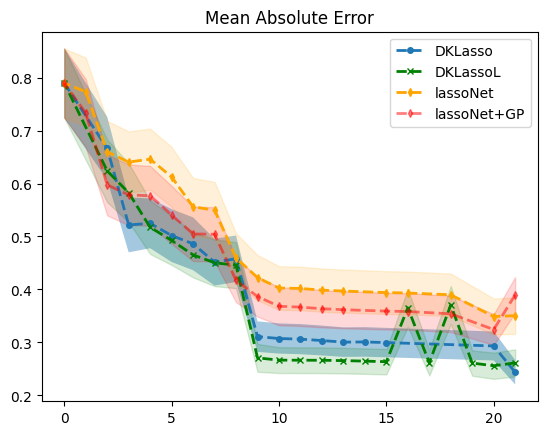

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# xi = list(range(19))
Non_additive, = ax.plot(DKLasso_mae_selected, DKLasso_mae_error, marker='o', linestyle='dashed', linewidth=2, markersize=4, label='DKLasso')
Additive, = ax.plot(DKLasso_mae_selected2, DKLasso_mae_error2, color='green', marker='x', linestyle='dashed', linewidth=2, markersize=4, label="DKLassoL")
lassonet, = ax.plot(lassonet_mae_selected, lassonet_mae_error, color='orange', marker='d', linestyle='dashed', linewidth=2, markersize=4, label='lassoNet')
lassoGP, = ax.plot(lassonet_mae_selected, lassoGP_mae_err, color='red', alpha = 0.5, marker='d', linestyle='dashed', linewidth=2, markersize=4, label='lassoNet+GP')
ax.legend(handles=[Non_additive, Additive, lassonet, lassoGP])
ax.fill_between(DKLasso_mae_selected, DKLasso_mae_error_lb, DKLasso_mae_error_ub, alpha=0.4)
ax.fill_between(DKLasso_mae_selected2, DKLasso_mae_error_lb2, DKLasso_mae_error_ub2, alpha=0.15, color="green")
ax.fill_between(lassonet_mae_selected, lassonet_mae_error_lb, lassonet_mae_error_ub, alpha=0.15,color="orange")
ax.fill_between(lassonet_mae_selected, lassoGP_mae_err_lb, lassoGP_mae_err_ub, alpha=0.15,color="red")
plt.title("Mean Absolute Error")

In [ ]:
print("selected  test_loss\n")
for i in range(len(selected)):
    print(f"{selected[i]:2}        {loss[i]:.3f}")

In [ ]:
print("selected  test_loss\n")
for i in range(len(selected2)):
    print(f"{selected2[i]:2}        {loss2[i]:.3f}")

In [ ]:
def load(path_item, model_obj):
    if isinstance(path_item, HistoryItem):
        state_dict = path_item.state_dict
        # likelihood_state_dict = state_dict.likelihood_state_dict
    model_tmp = model_obj.model
    model_tmp.load_state_dict(state_dict)
    
    return model_tmp

In [ ]:
model = load(path_results[47], SparseDKLModel)

In [ ]:
model2, likelihood2 = load(path_results[4], NNdims=NNdims, train_x=train_x, train_y=train_y)

In [ ]:
likelihood(model(train_x)).variance == likelihood2(model2(train_x)).variance

In [ ]:
import numpy as np
from math import floor

train_n = int(floor(0.8 * len(x)))
train_set = np.random.choice(np.arange(0,len(x)), train_n, replace=False)
train_x = x[train_set, :]
train_y = y[train_set]

test_set = np.delete(np.arange(0,len(x)), train_set)
test_x = x[test_set, :]
test_y = y[test_set]

In [ ]:
import gpytorch
SparseDKLModel.model.eval()
SparseDKLModel.likelihood.eval()
with torch.no_grad(), gpytorch.settings.use_toeplitz(False), gpytorch.settings.fast_pred_var():
    pred = SparseDKLModel.likelihood(SparseDKLModel.model(test_x))

In [ ]:
print('Test MAE: {}'.format(torch.mean(torch.abs(pred.mean - test_y))))

In [ ]:
from matplotlib import pyplot as plt

with torch.no_grad():
    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Get upper and lower confidence bounds
    lower, upper = pred.confidence_region()
    # Plot training data as black stars
    ax.plot(test_x[:,0].numpy(), test_y.numpy(), 'k*')
    # Plot predictive means as blue line
    ax.plot(test_x[:,0].numpy(), pred.mean.numpy(), 'b')
    # Shade between the lower and upper confidence bounds
    ax.fill_between(test_x[:,0].numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    ax.set_ylim([-2, 2])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])

In [ ]:
model.feature_extractor.skip.weight.data[1]

In [ ]:
model.feature_extractor.layers[0].weight